In [1]:
from quasinet.qnet import qdistance, save_qnet
from cognet.cognet import cognet as cg
from cognet.dataFormatter import dataFormatter
from cognet.model import model 
#import cognet.util
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
plt.style.use('fivethirtyeight')

In [2]:
## read in data, configure to Qnet specifications and fit Qnet model
data_obj=dataFormatter(samples="data/PTSD_cognet_test_processed.csv")
features,samples = data_obj.Qnet_formatter()

In [3]:
fit = False
model_obj = model()
if fit:
    model_obj.fit(data_obj=data_obj, njobs=2)
    # model_obj.save("examples_results/PTSD_cognet_test.joblib")
    save_qnet(model_obj.myQnet, "results/PTSD_cognet_test.joblib", low_mem=False)
else:
    model_obj.load("results/PTSD_cognet_test.joblib")

In [4]:
# load Qnet, write mpi files for distance matrix
# run qdistance matrix with "./mpi_run.sh" command
cognet_obj = cg()
cognet_obj.load_from_model(model_obj, data_obj, 'all')
cognet_obj.samples

,ptsd1,ptsd2,ptsd3,ptsd4,ptsd5,ptsd6,ptsd7,ptsd8,ptsd9,ptsd10,...,ptsd202,ptsd203,ptsd204,ptsd205,ptsd206,ptsd207,ptsd208,ptsd209,ptsd210,ptsd211
0,4,2,5,4,2,3,2,3,3,2,...,2,4,4,3,2,3,2,2,4,2
1,3,2,3,3,1,3,2,2,2,1,...,3,4,4,3,3,3,4,3,4,5
2,2,2,2,4,1,3,3,2,2,4,...,4,2,2,4,4,2,3,2,2,5
3,2,2,5,1,3,2,1,2,2,1,...,1,2,3,3,3,2,1,1,2,2
4,4,1,1,1,2,2,1,1,1,2,...,2,2,2,2,1,1,2,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,4,2,3,4,1,1,1,1,3,2,...,2,2,2,2,2,2,2,2,2,3
300,5,2,2,4,4,3,2,5,4,4,...,5,5,5,5,4,5,5,4,4,5
301,5,1,2,1,1,3,5,5,3,4,...,4,3,3,2,3,1,3,2,5,5
302,2,1,3,3,1,2,2,2,1,1,...,1,1,1,1,1,2,2,2,2,2


# Compute dissonance and random mask reconstruction for Qnet samples

In [5]:
# compute dissonance matrix of qnet samples
cognet_obj.set_nsamples(304)
cognet_obj.MAX_PROCESSES = 2
return_dict = cognet_obj.dissonance_matrix(outfile="mpi_tmp/PTSD_dissonance_matrix.csv", processes=2)
return_dict
qnet_dissonance_df=pd.DataFrame(return_dict.copy())

# computing random mask reconstruction of qnet samples
print("___________________________________________________")
cognet_obj.set_nsamples(304)
cognet_obj.steps = 1000
qnet_randommask_df = cognet_obj.randomMaskReconstruction_multiple('results/PTSD_randomMaskRecon_test.csv',  save_samples=True)
qnet_randommask_df

The number of selected samples (304) is equal to the number of samples (304)!
The number of samples have been set to 304
___________________________________________________
The number of selected samples (304) is equal to the number of samples (304)!
The number of samples have been set to 304


,rederr,r_prob,rand_err,mask_,sample,qsampled,random_sample
0,53.626008,0.215534,0.386655,"[ptsd1, ptsd3, ptsd9, ptsd11, ptsd12, ptsd15, ...","[4, 2, 5, 4, 2, 3, 2, 3, 3, 2, 3, 2, 4, 3, 3, ...","[5, 2, 2, 4, 2, 3, 2, 3, 4, 2, , , 4, 3, 4, 4,...","[5, 2, 3, 4, 2, 3, 2, 3, 2, 2, 1, 1, 4, 3, 4, ..."
1,47.867260,0.220833,0.432604,"[ptsd2, ptsd3, ptsd5, ptsd8, ptsd11, ptsd12, p...","[3, 2, 3, 3, 1, 3, 2, 2, 2, 1, 3, 1, 2, 2, 2, ...","[3, 1, , 3, 1, 3, 2, , 2, 1, 2, 2, , 3, 3, 3, ...","[3, 4, 5, 3, 3, 3, 2, 3, 2, 1, 4, 1, 3, 4, 4, ..."
2,51.478642,0.218636,0.373666,"[ptsd1, ptsd3, ptsd4, ptsd5, ptsd6, ptsd7, pts...","[2, 2, 2, 4, 1, 3, 3, 2, 2, 4, 4, 3, 3, 3, 3, ...","[3, 2, , 2, , 2, 2, , 2, 2, 4, 3, 3, 3, 3, 3, ...","[5, 2, 3, 3, 1, 3, 4, 4, 2, 4, 4, 2, 3, 3, 3, ..."
3,45.682859,0.215957,0.453468,"[ptsd2, ptsd3, ptsd5, ptsd7, ptsd9, ptsd10, pt...","[2, 2, 5, 1, 3, 2, 1, 2, 2, 1, 2, 3, 3, 3, 3, ...","[2, 2, 2, 1, 3, 2, , 2, 4, 2, 3, 3, 2, 3, 3, 1...","[2, 4, 5, 1, 3, 2, 3, 2, 2, 1, 1, 3, 4, 3, 3, ..."
4,41.824116,0.217677,0.457608,"[ptsd2, ptsd3, ptsd4, ptsd7, ptsd10, ptsd16, p...","[4, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 3, 3, 1, ...","[4, 2, 2, 4, 2, 2, , 1, 1, 3, 2, 1, 3, 3, 1, 4...","[4, 4, 5, 4, 2, 2, 3, 1, 1, 3, 2, 1, 3, 3, 1, ..."
...,...,...,...,...,...,...,...
299,50.327732,0.217273,0.390395,"[ptsd3, ptsd4, ptsd7, ptsd8, ptsd9, ptsd10, pt...","[4, 2, 3, 4, 1, 1, 1, 1, 3, 2, 1, 1, 2, 2, 2, ...","[4, 2, 2, , 1, 1, 2, , 2, 1, , 1, 2, 3, 2, 3, ...","[4, 2, 5, 4, 1, 1, 3, 2, 3, 1, 3, 1, 2, 4, 2, ..."
300,44.422173,0.217143,0.394546,"[ptsd1, ptsd6, ptsd7, ptsd9, ptsd12, ptsd14, p...","[5, 2, 2, 4, 4, 3, 2, 5, 4, 4, 4, 3, 4, 5, 5, ...","[2, 2, 2, 4, 4, 2, 4, 5, 2, 4, 4, 3, 4, 3, 5, ...","[5, 2, 2, 4, 4, 3, 2, 5, 3, 4, 4, 1, 4, 4, 5, ..."
301,41.214923,0.220673,0.407355,"[ptsd2, ptsd3, ptsd5, ptsd6, ptsd7, ptsd8, pts...","[5, 1, 2, 1, 1, 3, 5, 5, 3, 4, 2, 2, 3, 3, 4, ...","[5, 2, 2, 1, 3, , , 4, 3, 1, 2, 3, 2, 3, 4, 4,...","[5, 4, 5, 1, 3, 3, 2, 3, 3, 4, 2, 3, 4, 3, 4, ..."
302,43.494737,0.219196,0.419111,"[ptsd1, ptsd2, ptsd3, ptsd6, ptsd7, ptsd8, pts...","[2, 1, 3, 3, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, ...","[2, , 5, 3, 1, 2, 2, 3, 1, 2, 3, 2, 4, , 2, 2,...","[5, 4, 3, 3, 1, 2, 3, 3, 1, 4, 3, 2, 4, 1, 2, ..."


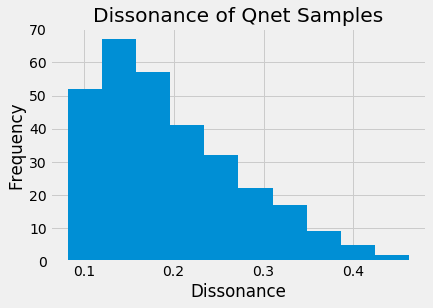

In [6]:
qnet_dissonance_df.mean(axis=1).hist()
plt.title("Dissonance of Qnet Samples")
plt.xlabel("Dissonance")
plt.ylabel("Frequency")
plt.show()

In [7]:
cognet_obj.steps = 200
# computing random mask reconstruction of qnet samples
print("___________________________________________________")
cognet_obj.set_nsamples(304)
qnet_randommask_df_200step = cognet_obj.randomMaskReconstruction_multiple('results/PTSD_randomMaskRecon_test.csv',  save_samples=False)
qnet_randommask_df_200step

___________________________________________________
The number of selected samples (304) is equal to the number of samples (304)!
The number of samples have been set to 304


,rederr,r_prob,rand_err,mask_
0,48.141243,0.217699,0.371665,"[ptsd1, ptsd2, ptsd3, ptsd9, ptsd10, ptsd11, p..."
1,53.786171,0.218229,0.396119,"[ptsd8, ptsd13, ptsd15, ptsd19, ptsd20, ptsd25..."
2,36.631752,0.216667,0.395786,"[ptsd6, ptsd9, ptsd10, ptsd11, ptsd15, ptsd16,..."
3,43.299647,0.219712,0.440503,"[ptsd1, ptsd2, ptsd4, ptsd8, ptsd10, ptsd11, p..."
4,43.702319,0.219328,0.450899,"[ptsd1, ptsd3, ptsd4, ptsd5, ptsd7, ptsd8, pts..."
...,...,...,...,...
299,51.212696,0.218421,0.396498,"[ptsd2, ptsd3, ptsd4, ptsd5, ptsd7, ptsd8, pts..."
300,44.445597,0.218317,0.386475,"[ptsd1, ptsd3, ptsd5, ptsd9, ptsd12, ptsd13, p..."
301,51.889161,0.217619,0.414254,"[ptsd1, ptsd2, ptsd3, ptsd5, ptsd6, ptsd12, pt..."
302,40.767947,0.219159,0.441100,"[ptsd3, ptsd4, ptsd7, ptsd10, ptsd11, ptsd14, ..."


In [8]:
# redefine the reconstruction error for PTSD
samples=[]
for s in qnet_randommask_df['sample']:
    samples.append(list(s))
qnet_randommask_samples=pd.DataFrame(data=samples, columns=features, dtype='int').astype(int)
qnet_randommask_samples

qsamples=[]
for s in qnet_randommask_df['qsampled']:
    qsamples.append(list(s))
qnet_randommask_qsamples=pd.DataFrame(data=qsamples, columns=features, dtype='int').replace('',0).astype(int)

In [9]:
# calculate the recon error
diff_df = qnet_randommask_samples - qnet_randommask_qsamples
diff_df1 = diff_df.copy()
diff_df["diff sum"] = diff_df.sum(axis=1)
num_masked = pd.DataFrame([len(list(s)) for s in qnet_randommask_df['mask_']], columns=["num masked"])
diff_df["num masked"] = num_masked
diff_df["recon_results"] = diff_df["diff sum"] / diff_df["num masked"]

# add PTSD indicator
PTSD_indicator = pd.read_csv("data/PTSD_cognet_test.csv")[["PTSDDx"]]

print(diff_df1[PTSD_indicator["PTSDDx"] == 0].mean().mean(),diff_df1[PTSD_indicator["PTSDDx"] == 1].mean().mean())

0.0038914735423279277 0.4688085528491127


In [10]:
diff_df1[PTSD_indicator["PTSDDx"] == 0]

,ptsd1,ptsd2,ptsd3,ptsd4,ptsd5,ptsd6,ptsd7,ptsd8,ptsd9,ptsd10,...,ptsd202,ptsd203,ptsd204,ptsd205,ptsd206,ptsd207,ptsd208,ptsd209,ptsd210,ptsd211
0,-1,0,3,0,0,0,0,0,-1,0,...,2,0,0,0,0,0,0,0,0,0
1,0,1,3,0,0,0,0,2,0,0,...,0,0,2,-1,0,0,0,0,0,5
2,-1,0,2,2,1,1,1,2,0,2,...,0,0,-2,0,1,1,0,0,0,5
3,0,0,3,0,0,0,1,0,-2,-1,...,0,0,0,0,-1,-1,0,0,-1,0
4,0,-1,-1,-3,0,0,1,0,0,-1,...,-3,-2,1,0,0,0,-1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,0,0,0,1,0,-3,-1,0,0,0,...,0,-2,-2,0,0,0,0,0,-2,3
298,-2,0,3,0,-2,0,0,4,-3,0,...,-3,0,1,4,0,0,1,0,-1,0
301,0,-1,0,0,-2,3,5,1,0,3,...,0,0,0,0,-2,-4,3,-2,2,1
302,0,1,-2,0,0,0,0,-1,0,-1,...,0,0,0,-2,0,0,-1,0,0,2


In [15]:
len(diff_df1[PTSD_indicator["PTSDDx"] == 1])

86

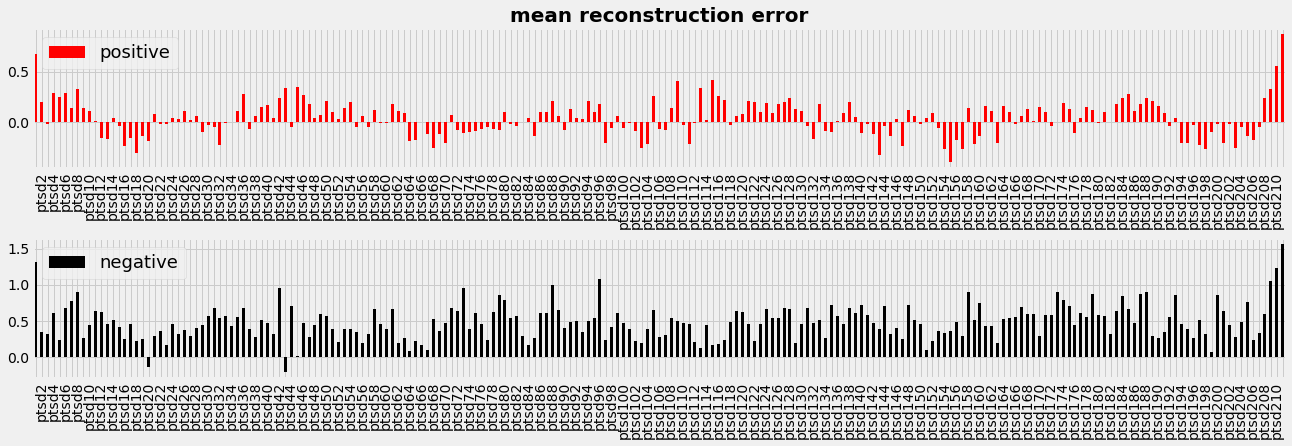

In [12]:
# plot the recon error grouped by PTSD indicator
plt.figure(figsize=[20,6])
plt.subplot(2,1,1)
plt.subplots_adjust(hspace=.5)
diff_df1[PTSD_indicator["PTSDDx"] == 0].mean().plot(kind='bar',color='r')
ax0=plt.gca()

plt.subplot(2,1,2)
diff_df1[PTSD_indicator["PTSDDx"] == 1].mean().plot(kind='bar',color='k')
ax=plt.gca()

[label.set_visible(False) for x in [ax, ax0] for label in x.xaxis.get_ticklabels()[::2]]
ax0.set_title('mean reconstruction error',fontsize=20,fontweight='bold')
ax0.legend(['positive'],fontsize=18)
ax.legend(['negative'],fontsize=18)

# plt.gca().set_xlabel('')
# diff_df1.mean().plot(kind="bar")
# ax=plt.gca()
# [label.set_visible(False) for label in ax.xaxis.get_ticklabels()[::2]]
# ax.set_title('mean reconstruction error',fontsize=15,fontweight='bold')

# Drawing Random Samples from Uniform Distribution

In [10]:
print("__________________________________________________")
n = 304
print("{} random samples computed".format(n))
usamples = cognet_obj.random_sample(type="uniform",n=n, n_jobs=3)
results = []
for s in range(len(usamples)):
    results.append(cognet_obj.dissonance(0, sample=usamples.iloc[s]))
urandom_dissonance_df = pd.DataFrame(results)
urandom_dissonance_df

__________________________________________________
304 random samples computed


,0,1,2,3,4,5,6,7,8,9,...,201,202,203,204,205,206,207,208,209,210
0,0.063971,0.966131,0.000000,0.000000,0.000000,0.000000,0.820499,0.316809,0.000000,0.000000,...,0.000000,0.781006,0.000000,0.237605,0.929776,0.709657,0.386621,0.755565,0.912776,0.000000
1,0.471746,0.954858,0.672995,0.361908,0.000000,0.813132,0.268866,0.232221,0.742860,0.099320,...,0.697271,0.000000,0.000000,0.725083,0.465837,0.000000,0.418811,0.745476,0.558691,0.066272
2,0.317330,0.000000,0.000000,0.264557,0.783144,0.000000,0.495652,0.841616,0.706409,0.171349,...,0.868162,0.272509,0.700189,0.000000,0.335577,0.000000,0.000000,0.879020,0.180958,0.052009
3,0.414940,0.960170,0.588462,0.280183,0.894618,0.521511,0.568805,0.537966,0.689066,0.076885,...,0.224965,0.267649,0.730954,0.631410,0.723571,0.846853,0.212982,0.690840,0.000000,0.000000
4,0.487657,0.000000,0.319741,0.258858,0.805446,0.747912,0.835905,0.466920,0.000000,0.309706,...,0.903926,0.000000,0.755486,0.296710,0.000000,0.000000,0.490492,0.640181,0.510825,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,0.476592,0.952774,0.475667,0.428931,0.896731,0.723090,0.831363,0.429621,0.442327,0.067280,...,0.476651,0.237855,0.215651,0.714286,0.310342,0.350812,0.482187,0.407906,0.381983,0.696998
300,0.666590,0.920037,0.024951,0.000000,0.852233,0.785816,0.471715,0.365147,0.218158,0.325750,...,0.354377,0.149402,0.316513,0.691585,0.454459,0.000000,0.413742,0.169818,0.474930,0.562541
301,0.485131,0.914381,0.012740,0.427612,0.000000,0.266613,0.618822,0.384548,0.772594,0.445151,...,0.898319,0.000000,0.451963,0.000000,0.313243,0.000000,0.296876,0.774878,0.000000,0.512717
302,0.409512,0.920069,0.598383,0.000000,0.854590,0.368774,0.481341,0.358964,0.352743,0.403586,...,0.550791,0.225221,0.485325,0.235389,0.497955,0.719360,0.621902,0.827985,0.581008,0.740552


Uniform Random Sampling Threshold (90%):  0.37444361100614737
Uniform Random Sampling Threshold (95%):  0.3670025558864659


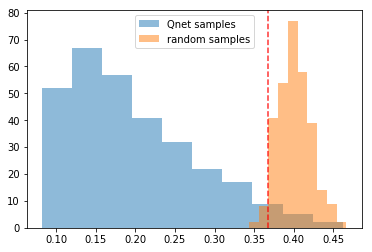

In [11]:
# find confidence interval for random samples drawn from uniform distributions
qnet_mean = urandom_dissonance_df.mean(axis=1).mean()
qnet_std = urandom_dissonance_df.mean(axis=1).std(ddof=1)
alpha_p1 = 0.1
alpha_p05 = 0.05
n_sided = 1 # 1-sided test
z_crit = stats.norm.ppf(1-alpha_p1/n_sided)
threshold_p1=(-z_crit*qnet_std)+qnet_mean

z_crit = stats.norm.ppf(1-alpha_p05/n_sided)
threshold_p05=(-z_crit*qnet_std)+qnet_mean

print('Uniform Random Sampling Threshold (90%): ',threshold_p1)
print('Uniform Random Sampling Threshold (95%): ',threshold_p05)

plt.figure()
udissonance_df = pd.DataFrame(data=qnet_dissonance_df.mean(axis=1), columns=["Qnet"])
udissonance_df["random"] = urandom_dissonance_df.mean(axis=1)
plt.hist(udissonance_df["Qnet"], alpha=0.5, label="Qnet samples")
plt.hist(udissonance_df["random"], alpha=0.5, label="random samples")
plt.legend()
plt.axvline(threshold_p05, color="red", linestyle="--", alpha=.8)
plt.show()

# Comparing Positive vs Negative PTSD dissonance and reconstruction results

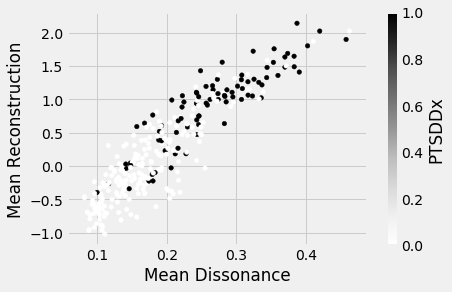

In [12]:
# getting positive and negative PTSD samples and merging with dissonance and reconstruction results
PTSD_DATA = pd.read_csv("data/PTSD_cognet_test.csv")[["PTSDDx"]]

PTSD_DATA["Mean Reconstruction"] = diff_df["recon_results"] # qnet_randommask_df["rederr"]
PTSD_DATA["Mean Dissonance"] = qnet_dissonance_df.mean(axis=1)

plt.style.use('fivethirtyeight')
PTSD_DATA.plot.scatter("Mean Dissonance", "Mean Reconstruction", c="PTSDDx")

[(-3, 3)]

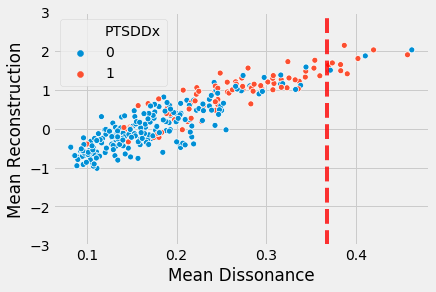

In [15]:
# plotting negative vs postive PTSD samples
#random_mask_dissonance_df.plot.scatter("Mean Dissonance", "Mean Reconstruction", c="actual")
plt.axvline(threshold_p05, color="red", linestyle="--", alpha=.8)
sns.scatterplot(PTSD_DATA["Mean Dissonance"],
                PTSD_DATA["Mean Reconstruction"],
                hue=PTSD_DATA["PTSDDx"]).set(ylim=(-3, 3))

In [16]:
print("Number of negative PTSD results that are 'suspect' at alpha level of .05:", len(PTSD_DATA[(PTSD_DATA["Mean Dissonance"] >= threshold_p05) & (PTSD_DATA["PTSDDx"] == 0)]["Mean Dissonance"]))
print("Number of positive PTSD results that are 'suspect' at alpha level of .05:", len(PTSD_DATA[(PTSD_DATA["Mean Dissonance"] >= threshold_p05) & (PTSD_DATA["PTSDDx"] == 1)]["Mean Dissonance"]))

Number of negative PTSD results that are 'suspect' at alpha level of .05: 3
Number of positive PTSD results that are 'suspect' at alpha level of .05: 10


In [18]:
PTSD_DATA[(PTSD_DATA["Mean Dissonance"] >= threshold_p05)]

,PTSDDx,Mean Reconstruction,Mean Dissonance
9,1,1.636364,0.369462
60,1,2.025641,0.419398
63,1,1.410714,0.390101
86,1,1.484848,0.369530
98,1,1.803922,0.402023
159,1,1.690722,0.373479
188,1,1.490000,0.382831
210,0,1.871287,0.410215
221,1,2.142857,0.386804
222,0,1.504274,0.371270
